<a href="https://colab.research.google.com/github/adishri99/traffic-prediction-dublin/blob/models_and_plotting/traffic_predictor_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math, sys
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import tensorflow
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras import callbacks
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# import data
# df = pd.read_csv('preproc_data.csv')
df = pd.read_csv('preproc_data.csv')
#df = df.set_index('End_Time')

df["End_Time"]= pd.to_datetime(df["End_Time"])
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436797 entries, 0 to 436796
Data columns (total 4 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   End_Time                         436797 non-null  datetime64[ns]
 1   Region                           436797 non-null  object        
 2   Site                             436797 non-null  int64         
 3   Average_volume_of_all_detectors  436797 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
df_final = df.copy()

In [ ]:
df.head()

,End_Time,Region,Site,Average_volume_of_all_detectors
0,2020-01-01 01:00:00,CCITY,1,9
1,2020-01-01 01:00:00,CCITY,2,174
2,2020-01-01 01:00:00,CCITY,3,39
3,2020-01-01 01:00:00,CCITY,17,8
4,2020-01-01 01:00:00,CCITY,19,21


Text(0.5, 0, 'Date')

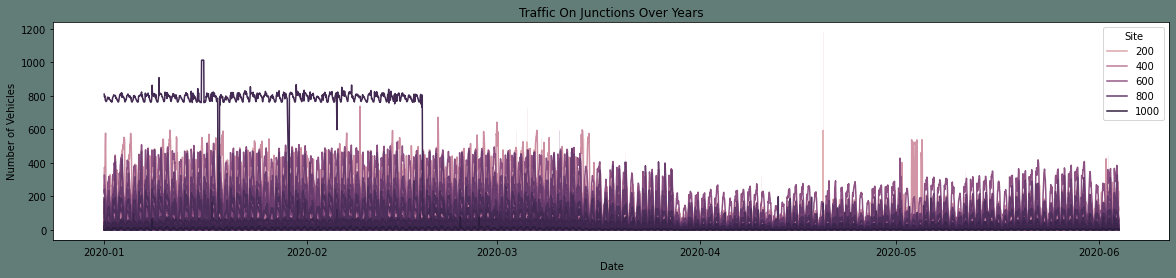

In [ ]:
colors = []
plt.figure(figsize=(20,4),facecolor="#627D78")
Time_series=sns.lineplot(x=df_final['End_Time'],y=df_final["Average_volume_of_all_detectors"],data=df_final, hue=df_final["Site"],palette=None)
Time_series.set_title("Traffic On Junctions Over Years")
Time_series.set_ylabel("Number of Vehicles")
Time_series.set_xlabel("Date")

Feature Engineering

In [ ]:
df_final["Month"]= df_final['End_Time'].dt.month
df_final["Date_no"]= df_final['End_Time'].dt.day
df_final["Hour"]= df_final['End_Time'].dt.hour
df_final["Day"]= df_final.End_Time.dt.strftime("%A")
df_final.head(10)

,End_Time,Region,Site,Average_volume_of_all_detectors,Month,Date_no,Hour,Day
0,2020-01-01 01:00:00,CCITY,1,9,1,1,1,Wednesday
1,2020-01-01 01:00:00,CCITY,2,174,1,1,1,Wednesday
2,2020-01-01 01:00:00,CCITY,3,39,1,1,1,Wednesday
3,2020-01-01 01:00:00,CCITY,17,8,1,1,1,Wednesday
4,2020-01-01 01:00:00,CCITY,19,21,1,1,1,Wednesday
5,2020-01-01 01:00:00,CCITY,20,34,1,1,1,Wednesday
6,2020-01-01 01:00:00,CCITY,26,130,1,1,1,Wednesday
7,2020-01-01 01:00:00,CCITY,29,10,1,1,1,Wednesday
8,2020-01-01 01:00:00,CCITY,36,123,1,1,1,Wednesday
9,2020-01-01 01:00:00,CCITY,37,103,1,1,1,Wednesday


Exploratory Data Analysis

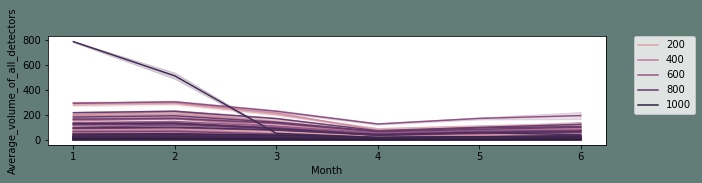

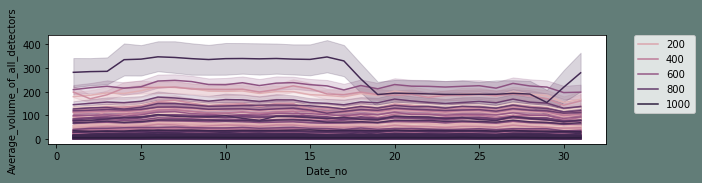

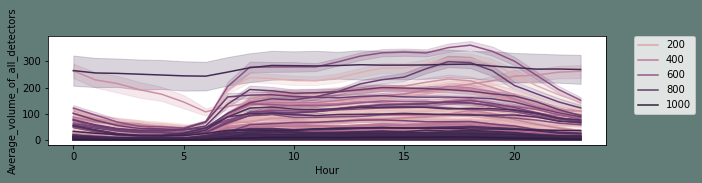

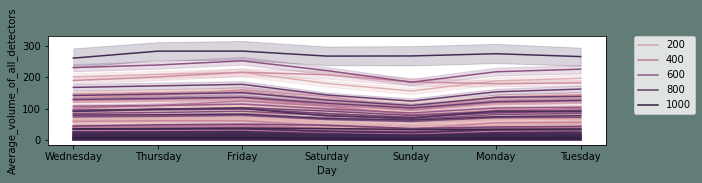

In [ ]:
new_features = [ "Month", "Date_no", "Hour", "Day"]

for i in new_features:
    plt.figure(figsize=(10,2),facecolor="#627D78")
    ax=sns.lineplot(x=df_final[i],y="Average_volume_of_all_detectors",data=df_final, hue="Site", palette=None)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

Text(0.5, 0, 'Month')

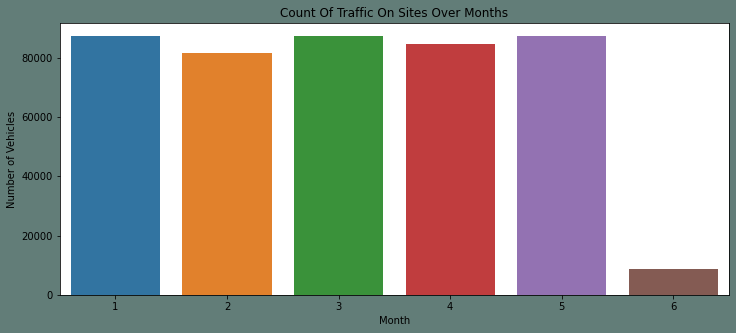

In [ ]:
plt.figure(figsize=(12,5),facecolor="#627D78")
count = sns.countplot(data=df_final, x =df_final["Month"], palette=None)
count.set_title("Count Of Traffic On Sites Over Months")
count.set_ylabel("Number of Vehicles")
count.set_xlabel("Month")

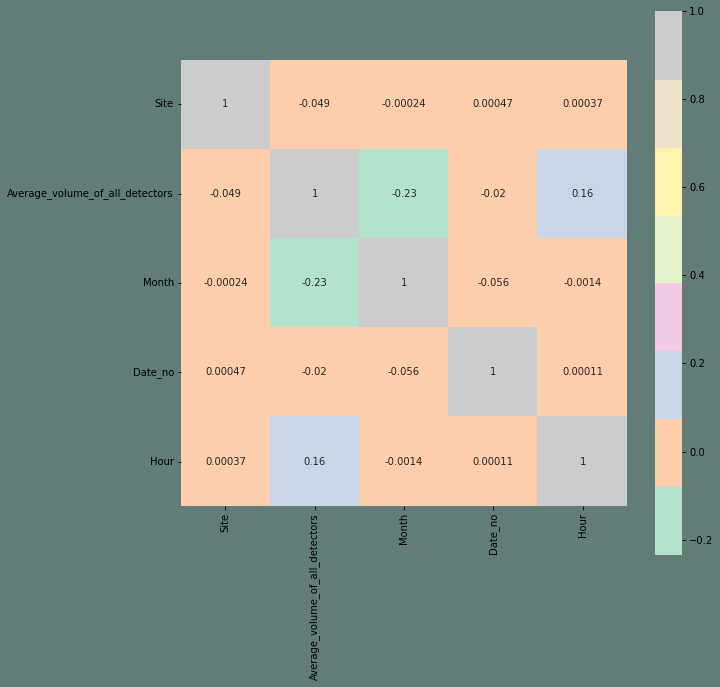

In [ ]:
corrmat = df_final.corr()
plt.subplots(figsize=(10,10),facecolor="#627D78")
sns.heatmap(corrmat,cmap= "Pastel2",annot=True,square=True, )

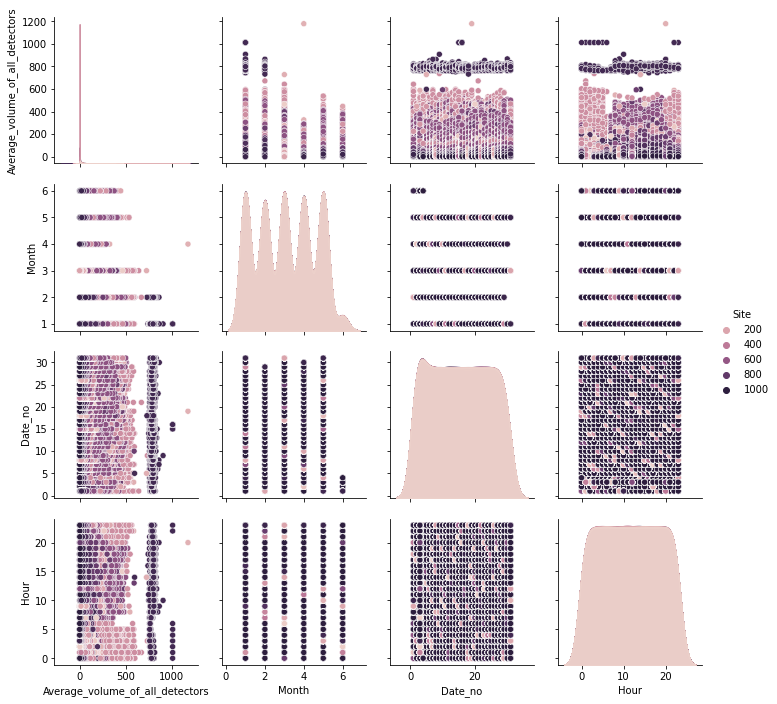

In [ ]:
sns.pairplot(data=df_final, hue= "Site",palette=None)